In [1]:
% load_ext autoreload
% autoreload 2

UsageError: Line magic function `%` not found.


# Accessing the Xenoscope DB in GSheets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pylars.utils.gsheets_db import xenoscope_db

/home/atp/rperes/software/PyLArS/pylars/processing/rawprocessor.py:5: TqdmExperimentalWarning: Using `tqdm.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm import tqdm


In [3]:
db = xenoscope_db()

In [4]:
run_types = db.get_run_types()
header = db.get_header()

In [5]:
df_run_db = db.get_run_db_df()

In [6]:
livetimes = pd.to_datetime(df_run_db['End\n(yyyy-mm-dd \nhh:mm:00)']) - pd.to_datetime(df_run_db['Start \n(yyyy-mm-dd \nhh:mm:ss)'])
sum_livetimes = [np.sum(livetimes[df_run_db['Run type'] == _run_type]).total_seconds() for _run_type in run_types]

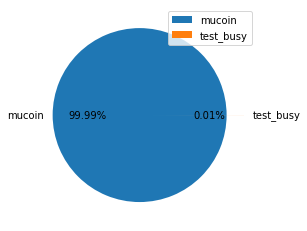

In [7]:
plt.figure(facecolor = 'white', )
plt.pie(sum_livetimes, explode = 0.1*np.ones(len(sum_livetimes)),
        labels=run_types, autopct='%1.2f%%')
plt.legend()
plt.show()

#### Through pylars directly

In [8]:
import pylars 

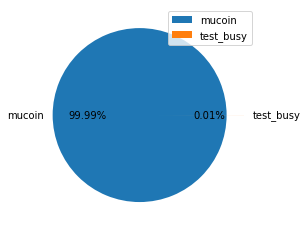

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


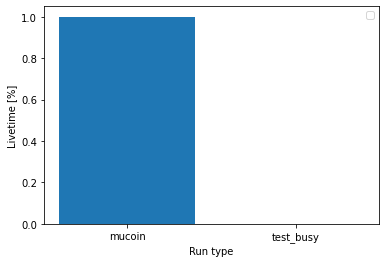

In [9]:
pylars.plotting.plot_run_type_livetimes()
pylars.plotting.plot_run_type_livetimes(style = 'bar')